<a href="https://colab.research.google.com/github/thaiqtran/EE-399-HW-5/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/thaiqtran/EE-399-HW-5

problem 1


rho=10, epoch=1, loss=51.6195
rho=10, epoch=2, loss=50.6691
rho=10, epoch=3, loss=49.7137
rho=10, epoch=4, loss=48.7629
rho=10, epoch=5, loss=47.8267
rho=10, epoch=6, loss=46.9109
rho=10, epoch=7, loss=46.0180
rho=10, epoch=8, loss=45.1521
rho=10, epoch=9, loss=44.3211
rho=10, epoch=10, loss=43.5332
rho=10, epoch=11, loss=42.7954
rho=10, epoch=12, loss=42.1108
rho=10, epoch=13, loss=41.4792
rho=10, epoch=14, loss=40.8974
rho=10, epoch=15, loss=40.3604
rho=10, epoch=16, loss=39.8621
rho=10, epoch=17, loss=39.3962
rho=10, epoch=18, loss=38.9569
rho=10, epoch=19, loss=38.5378
rho=10, epoch=20, loss=38.1330
rho=10, epoch=21, loss=37.7377
rho=10, epoch=22, loss=37.3474
rho=10, epoch=23, loss=36.9586
rho=10, epoch=24, loss=36.5699
rho=10, epoch=25, loss=36.1818
rho=10, epoch=26, loss=35.7969
rho=10, epoch=27, loss=35.4184
rho=10, epoch=28, loss=35.0478
rho=10, epoch=29, loss=34.6845
rho=10, epoch=30, loss=34.3269
rho=10, epoch=31, loss=33.9713
rho=10, epoch=32, loss=33.6129
rho=10, epoch=33,

/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


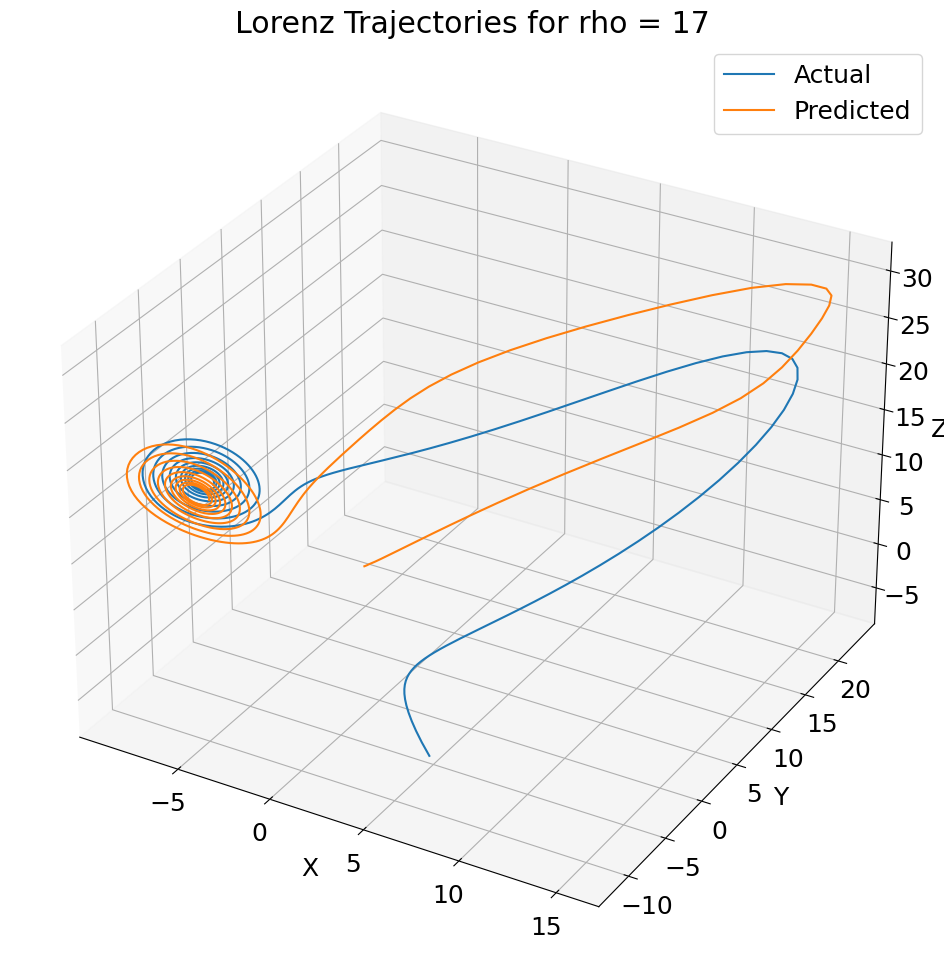

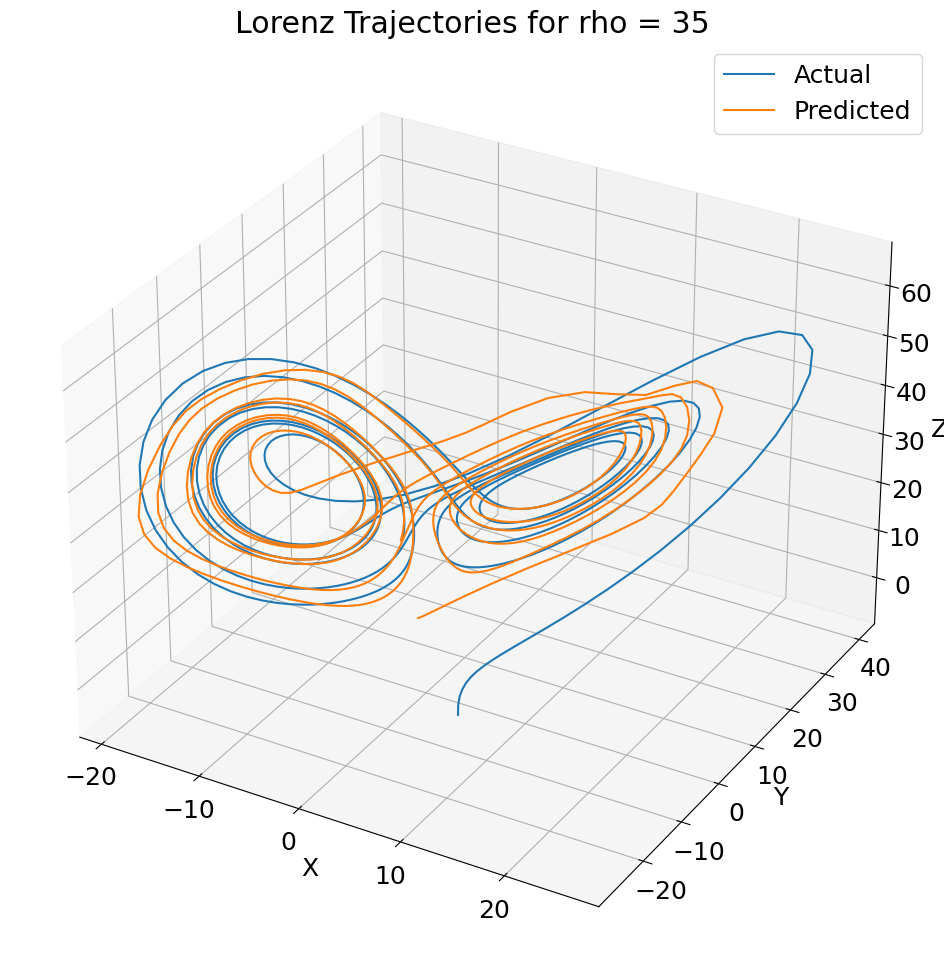

In [14]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.integrate import odeint

# Define the Lorenz equations
def lorenz_deriv(x_y_z, t0, sigma=10, beta=8/3, rho=28):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Define a function to generate training data for a given rho value
def generate_data(rho):
    dt = 0.01
    T = 8
    t = np.arange(0, T+dt, dt)
    np.random.seed(123)
    x0 = -15 + 30 * np.random.random((100, 3))
    x_t = np.asarray([odeint(lorenz_deriv, x0_j, t, args=(10, 8/3, rho))
                      for x0_j in x0])
    nn_input = np.zeros((100*(len(t)-1),3))
    nn_output = np.zeros_like(nn_input)
    for j in range(100):
        nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
        nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    return nn_input, nn_output

# Define activation functions
def logsig(x):
    return 1 / (1 + torch.exp(-x))

def radbas(x):
    return torch.exp(-torch.pow(x, 2))

def purelin(x):
    return x

# Define the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=3)
        
    def forward(self, x):
        x = logsig(self.fc1(x))
        x = radbas(self.fc2(x))
        x = purelin(self.fc3(x))
        return x

# Create model instance
model = MyModel()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model for different values of rho
for rho in [10, 28, 40]:
    nn_input, nn_output = generate_data(rho)
    nn_input = torch.from_numpy(nn_input).float()
    nn_output = torch.from_numpy(nn_output).float()
    for epoch in range(500):
        optimizer.zero_grad()
        outputs = model(nn_input)
        loss = criterion(outputs, nn_output)
        loss.backward()
        optimizer.step()
        print(f"rho={rho}, epoch={epoch+1}, loss={loss.item():.4f}")
# Use the trained model for future state prediction for rho=17 and rho=35
for rho in [17, 35]:
    nn_input, nn_output = generate_data(rho)
    nn_input = torch.from_numpy(nn_input).float()
    nn_output = torch.from_numpy(nn_output).float()
    with torch.no_grad():
        predicted_output = model(nn_input)
        mse = criterion(predicted_output, nn_output)
    print(f"rho={rho}, Mean Squared Error: {mse.item():.4f}")
# Use the trained model for future state prediction for rho=17 and rho=35
for rho in [17, 35]:
    
    # Generate input data for the given rho
    nn_input, nn_output = generate_data(rho)
    nn_input = torch.from_numpy(nn_input).float()
    nn_output = torch.from_numpy(nn_output).float()
    
    # Perform prediction using the trained model
    with torch.no_grad():
        predicted_output = model(nn_input)
    
    # Display the predicted output for a sample trajectory
    trajectory_idx = 0  # Index of the trajectory to visualize
    timesteps = len(t) - 1  # Number of timesteps in the trajectory
    
    # Extract x, y, and z coordinates for the actual and predicted trajectories
    actual_x = nn_output[trajectory_idx * timesteps: (trajectory_idx + 1) * timesteps, 0]
    actual_y = nn_output[trajectory_idx * timesteps: (trajectory_idx + 1) * timesteps, 1]
    actual_z = nn_output[trajectory_idx * timesteps: (trajectory_idx + 1) * timesteps, 2]
    
    predicted_x = predicted_output[trajectory_idx * timesteps: (trajectory_idx + 1) * timesteps, 0]
    predicted_y = predicted_output[trajectory_idx * timesteps: (trajectory_idx + 1) * timesteps, 1]
    predicted_z = predicted_output[trajectory_idx * timesteps: (trajectory_idx + 1) * timesteps, 2]
    
    # Plot the actual and predicted trajectories
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(actual_x, actual_y, actual_z, label='Actual')
    ax.plot(predicted_x, predicted_y, predicted_z, label='Predicted')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title(f"Lorenz Trajectories for rho = {rho}")
    plt.show()


problem 2

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Define the Lorenz equations
def lorenz_deriv(x_y_z, t0, sigma=10, beta=8/3, rho=28):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Define a function to generate training data for a given rho value
def generate_data(rho):
    dt = 0.01
    T = 8
    t = np.arange(0, T+dt, dt)
    np.random.seed(123)
    x0 = -15 + 30 * np.random.random((100, 3))
    x_t = np.asarray([odeint(lorenz_deriv, x0_j, t, args=(10, 8/3, rho))
                      for x0_j in x0])
    nn_input = np.zeros((100*(len(t)-1),3))
    nn_output = np.zeros_like(nn_input)
    for j in range(100):
        nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
        nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    return nn_input, nn_output

# Define activation functions
def logsig(x):
    return 1 / (1 + torch.exp(-x))

def radbas(x):
    return torch.exp(-torch.pow(x, 2))

def purelin(x):
    return x

# Define the feed-forward model
class FeedForwardModel(nn.Module):
    def __init__(self):
        super(FeedForwardModel, self).__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=3)
        
    def forward(self, x):
        x = logsig(self.fc1(x))
        x = radbas(self.fc2(x))
        x = purelin(self.fc3(x))
        return x

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=3, hidden_size=10, batch_first=True)
        self.fc = nn.Linear(10, 3)
        
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x)
        return x

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size=3, hidden_size=10, batch_first=True)
        self.fc = nn.Linear(10, 3)
        
    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x)
        return x

class ESNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ESNModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.hidden_layer = nn.Linear(input_size + hidden_size, hidden_size)
        self.output_layer = nn.Linear(input_size + hidden_size, output_size)
        self.activation = nn.Tanh()

    def forward(self, input_data, hidden_state):
        combined = torch.cat((input_data, hidden_state), dim=1)
        hidden = self.activation(self.hidden_layer(combined))
        output = self.output_layer(combined)
        return output, hidden

# Function to train and evaluate a given model
# Function to train and evaluate a given model
def train_and_evaluate_model(model, model_name):
    print(f"Training {model_name}...")

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Split the data into training and testing sets
    train_input, test_input, train_output, test_output = train_test_split(nn_input.numpy(), nn_output.numpy(), test_size=0.2, random_state=123)

    # Convert data to PyTorch tensors
    train_input = torch.from_numpy(train_input).float()
    train_output = torch.from_numpy(train_output).float()
    test_input = torch.from_numpy(test_input).float()
    test_output = torch.from_numpy(test_output).float()

    # Train the model
    for epoch in range(200):
        optimizer.zero_grad()
        outputs = model(train_input)
        loss = criterion(outputs, train_output)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 100 == 0:
            print(f"{model_name} - Epoch {epoch + 1}: Loss = {loss.item():.4f}")

    # Evaluate the model on the test set
    with torch.no_grad():
        predicted_output = model(test_input)
        mse = criterion(predicted_output, test_output)
        print(f"{model_name} - Mean Squared Error: {mse.item():.4f}")


# Generate data for the desired rho values
rhos = [10, 28, 40]
nn_input, nn_output = [], []
for rho in rhos:
    input_data, output_data = generate_data(rho)
    nn_input.append(input_data)
    nn_output.append(output_data)
nn_input = np.concatenate(nn_input)
nn_output = np.concatenate(nn_output)

# Convert data to PyTorch tensors
nn_input = torch.from_numpy(nn_input).float()
nn_output = torch.from_numpy(nn_output).float()

# Create instances of the models
feedforward_model = FeedForwardModel()
lstm_model = LSTMModel()
rnn_model = RNNModel()
esn_model = ESNModel(input_size=3, hidden_size=10, output_size=3)

# Train and evaluate the models
train_and_evaluate_model(feedforward_model, "Feed-Forward Model")
train_and_evaluate_model(lstm_model, "LSTM Model")
train_and_evaluate_model(rnn_model, "RNN Model")
train_and_evaluate_model(esn_model, "ESN Model")


Training Feed-Forward Model...
Feed-Forward Model - Epoch 100: Loss = 174.2101
Feed-Forward Model - Epoch 200: Loss = 95.7120
Feed-Forward Model - Mean Squared Error: 94.9440
Training LSTM Model...
LSTM Model - Epoch 100: Loss = 158.1438
LSTM Model - Epoch 200: Loss = 84.0609
LSTM Model - Mean Squared Error: 83.4067
Training RNN Model...
